In [4]:
import numpy as np
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
import plot_figures.compute_spectrum as spc
from scipy.signal import butter, lfilter, freqz
from denoise_dwt.reconstruct_dwt_wvpk import dwt_reconstruction, wvpk_reconstruction

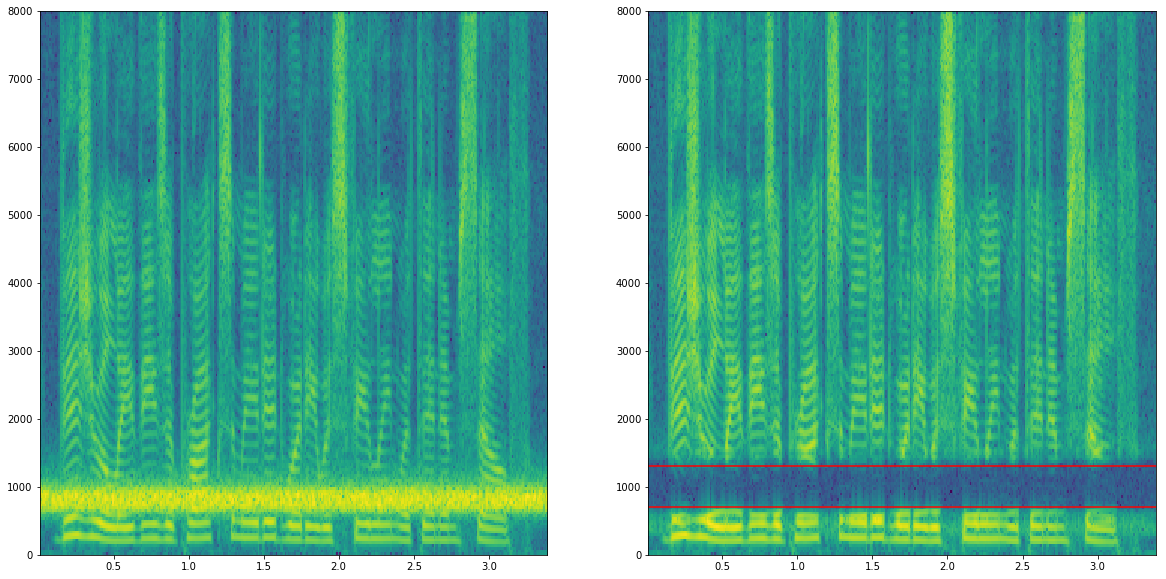

In [5]:
cfile = '../../../timit_dwt/s5/test/timit_clean.wav'
wfile = '../../../timit_dwt/s5/test/timit_white_700_900_snr_-10.wav'
#dfile = '../../../timit_dwt/s5/test/denoise_wvpk_L_4_db20_ign_12_clean.wav'
fs, wav = read(wfile)
fc, cwav = read(cfile)
L = 4
#rec_wav = dwt_reconstruction(wav,L, 'db20', '[3,4]', 'cd')
rec_wav = wvpk_reconstruction(wav, L , 'db20', '[1,2]')
rec_cwav = wvpk_reconstruction(cwav, L , 'db20', '[1,2]')
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ax[0].specgram(wav, Fs=fs, NFFT=int(.025*fs), noverlap=int(.015*fs))
ax[1].specgram(rec_wav, Fs=fs, NFFT=int(.025*fs), noverlap=int(.015*fs))
plt.axhline(y=700,color='r')
plt.axhline(y=1300, color='r')
#plt.savefig('../../../timit_dwt/s5/test/denoise_white_700_900.jpg')
plt.show()
#write(dfile, fs, rec_cwav.astype(np.int16))

## 

In [245]:
b = fs/2/(2**L)
print (b)
(fs / 2 / (2 **L)) * 1

500.0


500.0

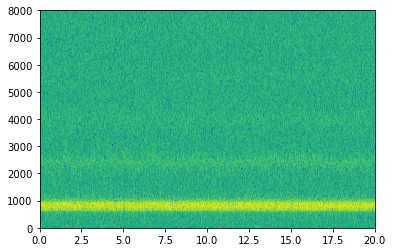

In [285]:
import numpy as np
from scipy.signal import butter, lfilter
from scipy.io.wavfile import write

#filename='./white_500_1500.wav'

fs = 16000
bandrange = [700, 900]
t = np.arange(0,20,1 / fs)
white = np.random.random(size=len(t))

B, A = butter(4, np.asarray(bandrange) / (fs/2), btype='bandpass')
subnoise = 100 * lfilter(B, A, white)
subnoise = subnoise.astype(np.int16)
#plt.plot(subnoise)
plt.specgram(subnoise, Fs=fs, NFFT=int(.025*fs), noverlap=int(.015*fs))
plt.show()

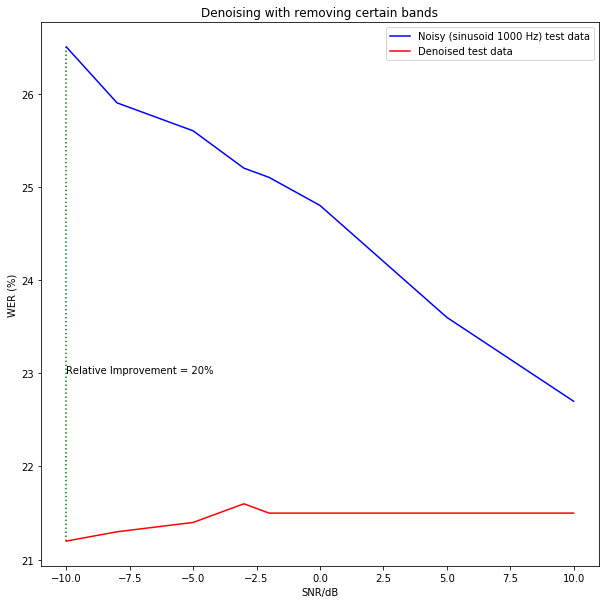

In [329]:
snr = [-10, -8, -5, -4, -3, -2, 0, 5, 10]
wer_noisy = [26.5, 25.9, 25.6, 25.4, 25.2, 25.1, 24.8, 23.6, 22.7]
denoise = [21.2, 21.3, 21.4, 21.5, 21.6, 21.5, 21.5, 21.5, 21.5]
fig.ax = plt.subplots(1, 1, figsize=(10,10))
plt.plot(snr, wer_noisy, 'b')
plt.plot(snr, denoise, 'r')
plt.xlabel('SNR/dB')
plt.ylabel('WER (%)')
plt.title('Denoising with removing certain bands')
plt.legend(['Noisy (sinusoid 1000 Hz) test data', 'Denoised test data'])
plt.vlines(-10, 21.2, 26.5, color='g', linestyle=':')
plt.text(-10, 23, 'Relative Improvement = 20%')
plt.savefig('../../../timit_dwt/s5/test/denoise_sin_1000hz.jpg')
plt.show()

In [331]:
np.exp(1)

2.7182818284590451

In [339]:
def compute_pdf(o, u, r):
    p = 1 / np.square(2 * np.pi * r) * np.exp(-(o - u) ** 2 / (2 * r))
    return p

In [369]:
alpha_1 = 1.0 * compute_pdf(0.27, 0.3, 1)
a = np.array([[0.5, 0.5], [0, 1.0]])
alpha=[]
o = (.27, .35, .65, .80)

In [371]:
alpha_2 = compute_pdf(.35, .3, 1.0) * (.5 * alpha_1) 

In [376]:
alpha_3 = compute_pdf(.65, .3, 1.0) * (.5 * alpha_2)
alpha_4 = compute_pdf(.80, .3, 1.0) * (.5 * alpha_3)

In [386]:
o = (.27, .35, .65, .80)
#alpha1 = [] # j=1
alpha2 = [] # j=2
#alpha1.append(alpha_1)
alpha2.append(0)
for i in range(1, 4):
    #alpha1.append(compute_pdf(o[i], .3, 1.0) * (.5 * alpha1[i-1]))
    alpha2.append(compute_pdf(o[i], .7, 1.0) * (.5 * alpha1[i-1] + 1.0 * alpha2[i-1]))
print (alpha2)

[0, 0.00030161612868219873, 1.1681643906630259e-05, 3.4250328203983326e-07]


In [389]:
alpha2[3] + alpha1[3]

3.8514605305335149e-07

In [395]:
beta1 = np.zeros(4)
beta2 = np.zeros(4)
beta2 = np.zeros(4)

beta1[3] = 1
beta2[3] = 1
for i in reversed(range(3)):
    beta1[i] = compute_pdf(o[i+1], .3, 1.0) * beta1[i+1] * .5 + compute_pdf(o[i+1], .7, 1.0) * beta2[i+1] * .5
    beta2[i] = compute_pdf(o[i+1], .3, 1.0) * beta1[i+1] * 0 + compute_pdf(o[i+1], .7, 1.0) * beta2[i+1] * 1
print (beta1)
print (beta2)

[  1.52118005e-05   6.02084123e-04   2.37789341e-02   1.00000000e+00]
[  1.51916838e-05   6.37626247e-04   2.52039605e-02   1.00000000e+00]


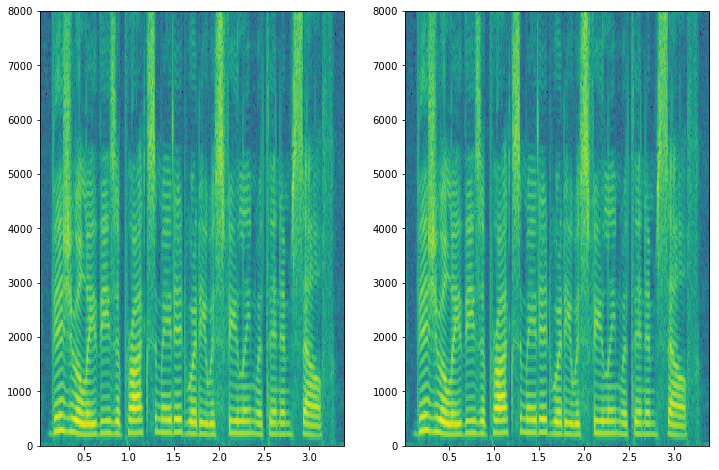

In [8]:
czero = np.zeros(len(cwav))
c1 = cwav+czero
c2 = cwav + 1e-10
fig2, ax2 = plt.subplots(1, 2, figsize=(12,8))
ax2[0].specgram(c1, Fs=fs, NFFT=int(.025*fs), noverlap=int(.015*fs))
ax2[1].specgram(c2, Fs = fs, NFFT=int(.025*fs), noverlap = int(.015*fs))
plt.show()


In [14]:
np.amax(c2-c1)

1.0004441719502211e-10